# SECTION - A [BATCH - 1]

# WEEK 7

# MINI PROJECT:

## DATASET: –> Amazon Reviews : http://snap.stanford.edu/data/web-Amazon-links.html

**METADATA:**


    Description:

            This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 to July 2014.This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs)

    DATA FORMAT:

product/productId: B00006HAXW \
product/title: Rock Rhythm & Doo Wop: Greatest Early Rock \
product/price: unknown \
review/userId: A1RSDE90N6RSZF \
review/profileName: Joseph M. Kotow \
review/helpfulness: 9/9 \
review/score: 5.0 \
review/time: 1042502400 \
review/summary: Pittsburgh - Home of the OLDIES \
review/text: I have all of the doo wop DVD's and this one is as good or better than the
1st ones. Remember once these performers are gone, we'll never get to see them again.
Rhino did an excellent job and if you like or love doo wop and Rock n Roll you'll LOVE
this DVD !! 
 
    WHERE:
 
product/productId: asin, e.g. amazon.com/dp/B00006HAXW \
product/title: title of the product \
product/price: price of the product \
review/userId: id of the user, e.g. A1RSDE90N6RSZF \
review/profileName: name of the user \
review/helpfulness: fraction of users who found the review helpful \
review/score: rating of the product \
review/time: time of the review (unix time) \
review/summary: review summary \
review/text: text of the review\

    SAMPLE METADATA:


{
  "asin": "0000031852", \
  "title": "Girls Ballet Tutu Zebra Hot Pink", \
  "price": 3.17, \
  "imUrl": "http://ecx.images-amazon.com/images/I/51fAmVkTbyL._SY300_.jpg", \
  "related": \
  { \
    "also_bought": ["B00JHONN1S", "B002BZX8Z6", "B00D2K1M3O", "0000031909", "B00613WDTQ", "B00D0WDS9A", "B00D0GCI8S", "0000031895", "B003AVKOP2", "B003AVEU6G", "B003IEDM9Q", "B002R0FA24", "B00D23MC6W", "B00D2K0PA0", "B00538F5OK", "B00CEV86I6", "B002R0FABA", "B00D10CLVW", "B003AVNY6I", "B002GZGI4E", "B001T9NUFS", "B002R0F7FE", "B00E1YRI4C", "B008UBQZKU", "B00D103F8U", "B007R2RM8W"],
    "also_viewed": ["B002BZX8Z6", "B00JHONN1S", "B008F0SU0Y", "B00D23MC6W", "B00AFDOPDA", "B00E1YRI4C", "B002GZGI4E", "B003AVKOP2", "B00D9C1WBM", "B00CEV8366", "B00CEUX0D8", "B0079ME3KU", "B00CEUWY8K", "B004FOEEHC", "0000031895", "B00BC4GY9Y", "B003XRKA7A", "B00K18LKX2", "B00EM7KAG6", "B00AMQ17JA", "B00D9C32NI", "B002C3Y6WG", "B00JLL4L5Y", "B003AVNY6I", "B008UBQZKU", "B00D0WDS9A", "B00613WDTQ", "B00538F5OK", "B005C4Y4F6", "B004LHZ1NY", "B00CPHX76U", "B00CEUWUZC", "B00IJVASUE", "B00GOR07RE", "B00J2GTM0W", "B00JHNSNSM", "B003IEDM9Q", "B00CYBU84G", "B008VV8NSQ", "B00CYBULSO", "B00I2UHSZA", "B005F50FXC", "B007LCQI3S", "B00DP68AVW", "B009RXWNSI", "B003AVEU6G", "B00HSOJB9M", "B00EHAGZNA", "B0046W9T8C", "B00E79VW6Q", "B00D10CLVW", "B00B0AVO54", "B00E95LC8Q", "B00GOR92SO", "B007ZN5Y56", "B00AL2569W", "B00B608000", "B008F0SMUC", "B00BFXLZ8M"], \
    "bought_together": ["B002BZX8Z6"] \
  }, \
  "salesRank": {"Toys & Games": 211836}, \
  "brand": "Coxlures", \
  "categories": [["Sports & Outdoors", "Other Sports", "Dance"]] \
}

    WHERE:

asin - ID of the product, e.g. 0000031852 \
title - name of the product \
price - price in US dollars (at time of crawl) \
imUrl - url of the product image \
related - related products (also bought, also viewed, bought together, buy after viewing) \
salesRank - sales rank information \
brand - brand name \
categories - list of categories the product belongs to \

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install gzip

ERROR: Could not find a version that satisfies the requirement gzip (from versions: none)
ERROR: No matching distribution found for gzip


In [3]:
# Converting the given data into Dataframe:

import gzip
import simplejson

def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

# for e in parse("Watches.txt"):
#   print(simplejson.dumps(e))

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
df_watch = getDF('Watches.txt')
df_watch

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura..."
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...
...,...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,Seiko Kinetic Diver Orange Dial Mens Watch SKA291,unknown,A2Q1V8EBYFMXSO,"Donald L. Buckle ""Number 2 Amazon Fan""",0/1,3.0,1249171200,Great watch with terrible band,A good dive watch with a terribly uncomfortabl...
68352,B000I5M96A,SeikoClock - QXA393SRH (Size: unisex-adult),unknown,A2YDSCQB2W0C8S,"Sanjay N. Patel ""Thoomplonk""",1/1,5.0,1209686400,Quiet Sweep Wall clock,Very elegant contemporary looking quiet sweep ...
68353,B000I5M96A,SeikoClock - QXA393SRH (Size: unisex-adult),unknown,A247QMDU9ZQASZ,M. Imhoff,0/0,3.0,1272844800,Was quiet at first,"I bought this clock two years ago, and it was ..."
68354,B000ISLYYK,New Philip Persio Leather Biker Cuff Mens Squa...,unknown,A1LRT7C0CP8M3S,Papou,0/0,4.0,1181347200,Good quality Watch,The watch in itself is quite good and it is ju...


In [6]:
df_watch.shape

(68356, 10)

In [8]:
df_watch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68356 entries, 0 to 68355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   68356 non-null  object
 1   product/title       68356 non-null  object
 2   product/price       68356 non-null  object
 3   review/userId       68356 non-null  object
 4   review/profileName  68356 non-null  object
 5   review/helpfulness  68356 non-null  object
 6   review/score        68356 non-null  object
 7   review/time         68356 non-null  object
 8   review/summary      68356 non-null  object
 9   review/text         68356 non-null  object
dtypes: object(10)
memory usage: 5.7+ MB


In [9]:
# Checking for missing values:

df_watch.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [10]:
df_watch.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura..."
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...


In [11]:
df_watch[df_watch['product/price'] == 'unknown'].shape

(30795, 10)

In [12]:
df_watch[df_watch['product/productId'] == 'B000AIO6RA']['product/title']

3    Seiko Men's Criteria "Orange Bullet" Automatic...
4    Seiko Men's Criteria "Orange Bullet" Automatic...
Name: product/title, dtype: object

In [13]:
df_watch['review/score'].value_counts()

5.0    39206
4.0    14726
3.0     5398
1.0     5376
2.0     3650
Name: review/score, dtype: int64

In [16]:
rating_percent = df_watch['review/score'].value_counts()/len(df_watch) * 100
rating_percent

5.0    57.355609
4.0    21.543098
3.0     7.896893
1.0     7.864708
2.0     5.339692
Name: review/score, dtype: float64

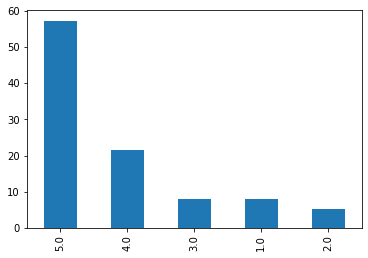

In [17]:
rating_percent.plot.bar()
plt.show()

In [38]:
df_watch.drop(['product/price'], axis = 1)

,product/productId,product/title,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura..."
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...
...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,Seiko Kinetic Diver Orange Dial Mens Watch SKA291,A2Q1V8EBYFMXSO,"Donald L. Buckle ""Number 2 Amazon Fan""",0/1,3.0,1249171200,Great watch with terrible band,A good dive watch with a terribly uncomfortabl...
68352,B000I5M96A,SeikoClock - QXA393SRH (Size: unisex-adult),A2YDSCQB2W0C8S,"Sanjay N. Patel ""Thoomplonk""",1/1,5.0,1209686400,Quiet Sweep Wall clock,Very elegant contemporary looking quiet sweep ...
68353,B000I5M96A,SeikoClock - QXA393SRH (Size: unisex-adult),A247QMDU9ZQASZ,M. Imhoff,0/0,3.0,1272844800,Was quiet at first,"I bought this clock two years ago, and it was ..."
68354,B000ISLYYK,New Philip Persio Leather Biker Cuff Mens Squa...,A1LRT7C0CP8M3S,Papou,0/0,4.0,1181347200,Good quality Watch,The watch in itself is quite good and it is ju...


**FOODS:**

In [18]:
df_food = getDF('Gourmet_Foods.txt')
df_food

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000EVS4TY,"Arrowhead Mills Cookie Mix, Chocolate Chip, 12...",unknown,A2SRVDDDOQ8QJL,MJ23447,2/4,4.0,1206576000,Delicious cookie mix,I thought it was funny that I bought this prod...
1,B0000DF3IX,Paprika Hungarian Sweet,unknown,A244MHL2UN2EYL,"P. J. Whiting ""book cook""",0/0,5.0,1127088000,Sweet Paprika: A sweet ingredient!,While in Hungary we were given a recipe for Hu...
2,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A3FL7SXVYMC5NR,Brittany,3/3,5.0,1138147200,Best Cereal BY FAR,"Without a doubt, I would recommend this wholes..."
3,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A12IDQSS4OW33B,Robin Goodfellow,3/3,5.0,1118016000,Oh!,This cereal is so sweet....yet so good for you...
4,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A2GZKHC1M4PKF4,lostinseganet,2/2,3.0,1206489600,Oh's what a cereal! (^_^) ...Oh's what a price...,Man I love Oh's cereal. It is really great to ...
...,...,...,...,...,...,...,...,...,...,...
154630,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",32.97,A2PPQK2TYMXK9Z,Sadie Mack,2/3,4.0,1167955200,Neuva Cocina Rice Mix for Chicken,"The rice mix makes a tasty quick meal, however..."
154631,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",32.97,A3K8M6LVS06YH4,rearview1,0/0,5.0,1338336000,Folks with Cuban relatives say it's excellent!,My title says it all. I've had a friend say it...
154632,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",32.97,AGN3DEM61TN1B,"M. Charris ""marchar international""",0/0,5.0,1335744000,"good product, would recommend to a friend",nice pleasant taste. it is nice to find a rice...
154633,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",32.97,A19SDJ2TSSL8HI,"K. McGee ""KayJay""",0/0,5.0,1333324800,Can Be Made so Its Diabetic Friendly!,"If you are a type 2 diabetic, then you've prob..."


In [19]:
df_food[df_food['product/price'] == 'unknown'].shape

(32058, 10)

In [20]:
rating_percent_f = df_food['review/score'].value_counts()/len(df_food) * 100
rating_percent_f

5.0    66.433860
4.0    13.326866
1.0     8.707602
3.0     6.722282
2.0     4.809390
Name: review/score, dtype: float64

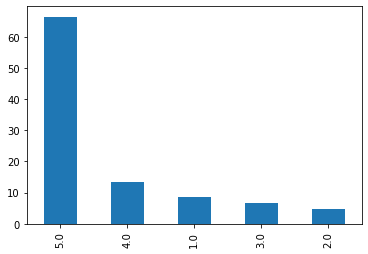

In [21]:
rating_percent_f.plot.bar()
plt.show()

In [39]:
df_food.drop(['product/price'], axis = 1)

,product/productId,product/title,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000EVS4TY,"Arrowhead Mills Cookie Mix, Chocolate Chip, 12...",A2SRVDDDOQ8QJL,MJ23447,2/4,4.0,1206576000,Delicious cookie mix,I thought it was funny that I bought this prod...
1,B0000DF3IX,Paprika Hungarian Sweet,A244MHL2UN2EYL,"P. J. Whiting ""book cook""",0/0,5.0,1127088000,Sweet Paprika: A sweet ingredient!,While in Hungary we were given a recipe for Hu...
2,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),A3FL7SXVYMC5NR,Brittany,3/3,5.0,1138147200,Best Cereal BY FAR,"Without a doubt, I would recommend this wholes..."
3,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),A12IDQSS4OW33B,Robin Goodfellow,3/3,5.0,1118016000,Oh!,This cereal is so sweet....yet so good for you...
4,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),A2GZKHC1M4PKF4,lostinseganet,2/2,3.0,1206489600,Oh's what a cereal! (^_^) ...Oh's what a price...,Man I love Oh's cereal. It is really great to ...
...,...,...,...,...,...,...,...,...,...
154630,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",A2PPQK2TYMXK9Z,Sadie Mack,2/3,4.0,1167955200,Neuva Cocina Rice Mix for Chicken,"The rice mix makes a tasty quick meal, however..."
154631,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",A3K8M6LVS06YH4,rearview1,0/0,5.0,1338336000,Folks with Cuban relatives say it's excellent!,My title says it all. I've had a friend say it...
154632,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",AGN3DEM61TN1B,"M. Charris ""marchar international""",0/0,5.0,1335744000,"good product, would recommend to a friend",nice pleasant taste. it is nice to find a rice...
154633,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Uni...",A19SDJ2TSSL8HI,"K. McGee ""KayJay""",0/0,5.0,1333324800,Can Be Made so Its Diabetic Friendly!,"If you are a type 2 diabetic, then you've prob..."


**KINDLE STORE:**

In [22]:
df_kindle = getDF('Kindle_Store.txt')
df_kindle

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000FBFH7K,Self-Knowledge and the Self,unknown,A3VPRWEPH6C823,Yuri Kuzyk,4/4,5.0,1026172800,An up to date overview...,Jopling does an admirable job of tackling the ...
1,B000OI0QDO,Russian Messianism (Routledge Advances in Euro...,unknown,ABDE6L94T5H8R,"Andreas Umland ""SPPS""",5/7,5.0,1009670400,Varieties of Russian Messianism Explored,"In this dense, highly informative study Peter ..."
2,B000OI0QFW,Against Politics (Routledge Studies in Social ...,unknown,A2SOHLD70OSUCB,"""zacharym87""",17/17,4.0,960422400,The case against the state,De Jasay's book does an excellent job punctuat...
3,B000OI0QFM,Polish Solidarity Movement (Routledge Studies ...,unknown,unknown,unknown,2/2,3.0,909273600,For poly-sci majors only,"Scholarly to the extreme, this book assumes kn..."
4,B000FBFHES,Landmarks in Linguistic Thought Volume III: Th...,unknown,AO3BAW8YSYFLW,Thomas Emerson,9/10,5.0,1052697600,Excellent overview of traditional Arabic lingu...,Versteegh provides a thorough and very readabl...
...,...,...,...,...,...,...,...,...,...,...
160788,B000JMKRZ2,Viva Las Bad Boys!,unknown,AFVQZQ8PW0L,Harriet Klausner,4/5,5.0,1154476800,fun lighthearted romps,"""Jackpot"". At the Berkley Hotel and Casino in ..."
160789,B000JMKRZ2,Viva Las Bad Boys!,unknown,A3JWRX7PDJBJ57,Michelle Skidmore,0/0,4.0,1360972800,A scorching read!,"Ladies, prepare to have your sock knocked off...."
160790,B000JMKRZ2,Viva Las Bad Boys!,unknown,A1LN2JWHEX1RDW,"M. Gorman ""BookLoverChelle""",0/0,4.0,1349827200,Fun and sexy read,"**Side note, HelenKay is a personal friend so ..."
160791,B000FCK5O4,Fashion Victim: A novel by Sam Baker (Annie An...,unknown,AFVQZQ8PW0L,Harriet Klausner,3/4,5.0,1118275200,wonderful who-done-it,Investigative reporter Annie Anderson worked e...


In [23]:
df_kindle[df_kindle['product/price'] == 'unknown'].shape

(160719, 10)

In [34]:
df_kindle.drop(['product/price'], axis = 1)

,product/productId,product/title,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000FBFH7K,Self-Knowledge and the Self,A3VPRWEPH6C823,Yuri Kuzyk,4/4,5.0,1026172800,An up to date overview...,Jopling does an admirable job of tackling the ...
1,B000OI0QDO,Russian Messianism (Routledge Advances in Euro...,ABDE6L94T5H8R,"Andreas Umland ""SPPS""",5/7,5.0,1009670400,Varieties of Russian Messianism Explored,"In this dense, highly informative study Peter ..."
2,B000OI0QFW,Against Politics (Routledge Studies in Social ...,A2SOHLD70OSUCB,"""zacharym87""",17/17,4.0,960422400,The case against the state,De Jasay's book does an excellent job punctuat...
3,B000OI0QFM,Polish Solidarity Movement (Routledge Studies ...,unknown,unknown,2/2,3.0,909273600,For poly-sci majors only,"Scholarly to the extreme, this book assumes kn..."
4,B000FBFHES,Landmarks in Linguistic Thought Volume III: Th...,AO3BAW8YSYFLW,Thomas Emerson,9/10,5.0,1052697600,Excellent overview of traditional Arabic lingu...,Versteegh provides a thorough and very readabl...
...,...,...,...,...,...,...,...,...,...
160788,B000JMKRZ2,Viva Las Bad Boys!,AFVQZQ8PW0L,Harriet Klausner,4/5,5.0,1154476800,fun lighthearted romps,"""Jackpot"". At the Berkley Hotel and Casino in ..."
160789,B000JMKRZ2,Viva Las Bad Boys!,A3JWRX7PDJBJ57,Michelle Skidmore,0/0,4.0,1360972800,A scorching read!,"Ladies, prepare to have your sock knocked off...."
160790,B000JMKRZ2,Viva Las Bad Boys!,A1LN2JWHEX1RDW,"M. Gorman ""BookLoverChelle""",0/0,4.0,1349827200,Fun and sexy read,"**Side note, HelenKay is a personal friend so ..."
160791,B000FCK5O4,Fashion Victim: A novel by Sam Baker (Annie An...,AFVQZQ8PW0L,Harriet Klausner,3/4,5.0,1118275200,wonderful who-done-it,Investigative reporter Annie Anderson worked e...


In [36]:
df_kindle.shape

(160793, 10)

In [ ]:
df_kindle.drop()

In [24]:
rating_percent_k = df_kindle['review/score'].value_counts()/len(df_kindle) * 100
rating_percent_k

5.0    54.099992
4.0    21.049424
3.0     9.751668
1.0     8.783343
2.0     6.315573
Name: review/score, dtype: float64

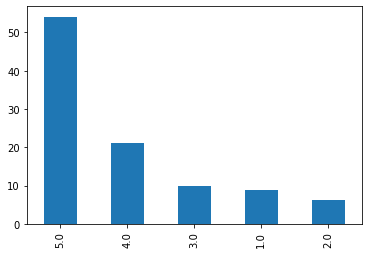

In [25]:
rating_percent_k.plot.bar()
plt.show()

**BEAUTY:**

In [26]:
df_beauty = getDF('Beauty.txt')
df_beauty

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1FWT811DSZLC8,Heidi M,0/0,3.0,1360368000,doesn't last,very light scent that doesn't last very long. ...
1,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1THE6V6O8ROD4,"Donna Mpaulin ""PURPLE RAVEN""",0/0,5.0,1358467200,Smells divine.,"This is my second bottle of sheer freesia, I j..."
2,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A176IQ7MVD3N6T,M. Avila,0/0,1.0,1357084800,Very disappointed!,This perfume is just AWFUL! Smells nothing lik...
3,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A34BDX4JVMG23Y,Kim M. Colt,0/0,5.0,1326240000,Nice gift,This was a gift for my sister. It wowed her. S...
4,B000K5JBZU,Optimum Care Anti-Breakage Therapy Moisture Re...,5.99,A3UWJXJI7S3T05,PloveJ,1/1,5.0,1351987200,TRULY MADE A DIFFERENCE!,I have been using this product for a couple ye...
...,...,...,...,...,...,...,...,...,...,...
252051,B000FKGRSO,"Artec Kiwi Coloreflector Shine Wax, 2-Ounce Ja...",unknown,AGEYHIE3Y3NUR,J. Hatten,0/0,5.0,1157155200,ARTEC Kiwi Coloreflector shine wax,I have really enjoyed this product. It has a g...
252052,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A3M174IC0VXOS2,Gail Cooke,1/1,5.0,1250467200,A SWEET SCENT,Since its founding in 1982 Thymes has won legi...
252053,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A2SZ9BG00RYAHG,&#34;Janie&#34;,0/0,5.0,1262476800,Luscious!!!,I love love love this item!!! The scent is lik...
252054,B000BR64OS,Guerlain Vetiver Eau de Toilette,unknown,A13NEK0V8EMHPO,PA Fishing Maps,6/6,2.0,1321228800,This is the new formula- NOT vintage as pictured,Received the order very quickly but what arriv...


In [27]:
df_beauty[df_beauty['product/price'] == 'unknown'].shape

(38788, 10)

In [28]:
rating_percent_b = df_beauty['review/score'].value_counts()/len(df_beauty) * 100
rating_percent_b

5.0    63.508109
4.0    14.228981
1.0     9.920811
3.0     7.211889
2.0     5.130209
Name: review/score, dtype: float64

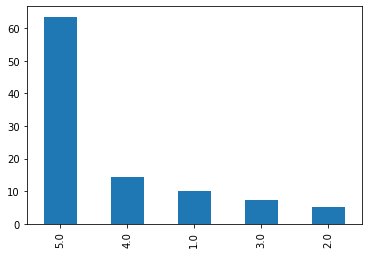

In [29]:
rating_percent_b.plot.bar()
plt.show()

In [45]:
df_beauty.drop(['product/price'], axis = 1)

,product/productId,product/title,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,A1FWT811DSZLC8,Heidi M,0/0,3.0,1360368000,doesn't last,very light scent that doesn't last very long. ...
1,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,A1THE6V6O8ROD4,"Donna Mpaulin ""PURPLE RAVEN""",0/0,5.0,1358467200,Smells divine.,"This is my second bottle of sheer freesia, I j..."
2,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,A176IQ7MVD3N6T,M. Avila,0/0,1.0,1357084800,Very disappointed!,This perfume is just AWFUL! Smells nothing lik...
3,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,A34BDX4JVMG23Y,Kim M. Colt,0/0,5.0,1326240000,Nice gift,This was a gift for my sister. It wowed her. S...
4,B000K5JBZU,Optimum Care Anti-Breakage Therapy Moisture Re...,A3UWJXJI7S3T05,PloveJ,1/1,5.0,1351987200,TRULY MADE A DIFFERENCE!,I have been using this product for a couple ye...
...,...,...,...,...,...,...,...,...,...
252051,B000FKGRSO,"Artec Kiwi Coloreflector Shine Wax, 2-Ounce Ja...",AGEYHIE3Y3NUR,J. Hatten,0/0,5.0,1157155200,ARTEC Kiwi Coloreflector shine wax,I have really enjoyed this product. It has a g...
252052,B00025X06E,Goldleaf Perfumed Body Cream 230ml,A3M174IC0VXOS2,Gail Cooke,1/1,5.0,1250467200,A SWEET SCENT,Since its founding in 1982 Thymes has won legi...
252053,B00025X06E,Goldleaf Perfumed Body Cream 230ml,A2SZ9BG00RYAHG,&#34;Janie&#34;,0/0,5.0,1262476800,Luscious!!!,I love love love this item!!! The scent is lik...
252054,B000BR64OS,Guerlain Vetiver Eau de Toilette,A13NEK0V8EMHPO,PA Fishing Maps,6/6,2.0,1321228800,This is the new formula- NOT vintage as pictured,Received the order very quickly but what arriv...


**Cell Phones Accessories:**

In [30]:
df_acc = getDF('Cell_Phones_&_Accessories.txt')
df_acc

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...
...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...


In [31]:
df_acc[df_acc['product/price'] == 'unknown'].shape

(43287, 10)

In [32]:
rating_percent_c = df_acc['review/score'].value_counts()/len(df_acc) * 100
rating_percent_c

5.0    38.328899
4.0    22.446472
1.0    18.592424
3.0    11.046497
2.0     9.585709
Name: review/score, dtype: float64

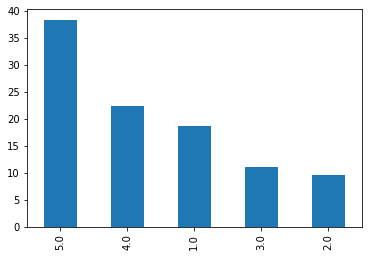

In [33]:
rating_percent_c.plot.bar()
plt.show()

In [44]:
df_acc.drop(['product/price'], axis = 1)

,product/productId,product/title,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...
...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...


In [46]:
help_percent_c = df_acc['review/helpfulness'].value_counts()
help_percent_c

0/0        34920
1/1         9585
2/2         4281
0/1         2555
3/3         2477
           ...  
11/65          1
111/114        1
45/66          1
7/36           1
1/25           1
Name: review/helpfulness, Length: 1305, dtype: int64

**OBJECTIVE:**

In this Mini Project we build a recomendation system where we recommend items to users with the help of user based similarity i.e., using collaborative filtering.

    SUB OBJECTIVES:
    
    -Convet data into a form that can be handled (convert to Dataframe)
    
    -Do preprocessing with the help of libraries and remove attributes that are not neccessary
    
    -Do EDA to know the data better, helps understand the characteristics of data
    
    -Now build a recomendation system with collaborative filtering that recomends items on user based similarty
    
    -Now we can deploy this model by hosting a web page with stream lit as UI and using FAST API or we can also use Gradio
